## Overview

In this article we will working on the application which will be capable enough to convert any given image to it's **`water color art`** form, for that we will be using just **computer vision operations** i.e. neither frameworks nor any machine learning techniques will be involved just pure **image processing** techniques will be enough to accomplish this task. 

## Real world use case 

1. **`Cartoonify the image`**: Though in this particular task we will be working on the water color art but the main thing is if we will fine tune the parameters we can achieve this task as well we just need to brush up our concepts.
2. **`Apply filters`**: We can also apply the various kind of filters using same techniques which can be very helpful in industrial point of view most specifically for VR/AR companies.
3. **`Modifying images`**: Nowadays many application are developed in the market which gives the pricky effect to the pictures and this filter kind of image processing can surely contribute to those applications.

## How we will gonna approach this problem statement

1. **Phase 1: Input the image and resize it**- We all know about the fact that we obviously need an image to peform computer vision concepts on it but there is a strict logic behind resizing it, let's take a **`example`** to explain that reason so suppose you will be operating on **1000x1000 dimension image** and **500x500 dimension image** and we are taking **`3x3`** kernel to operate on every size of the image then in that case that 3x3 kernel will behave differently for different dimension images so to remove this complexity and to make sure that in every dimension of image our results should be same for that, it is always a good practice to use **resize** method so that kernel operations are done effectively.


2. **Phase 2: Clearing the impurities**- In this phase we will clear all the impurities when I say impurities it's not dust :) but the impurities in the image that will **lags** the operations due to the **`color variations`** it can be a **spot** or **uneven pixels distributions** that can lead to delay in applying the filters, for removing these impuritites from the image we have ample of functionalities like, **`median filtering`**, **`edge blurring`** and more we will discuss them in detail during this phase.


3. **Phase 3: Apply Filtering**- In this phase we will apply our desired filters on the image like in this particular problem statement we will apply such filtering techniques that will be converting the **real image into water colored painting effect** and for that we will be performing some filtering technques like, **`Guassian or Bilateral filtering`** that we will be discussing in this particular phase.


4. **Phase 4: Tuning the Art**- In this phase we will be tuning the art to give our filtering a more clearer picture as suppose after applying the desired filters we get the **`blurred`** effect so to remove that we will be applying the **`sharpening`** technique to sharpen the image and what if the result we got is showing some dull colors so for that we will be applying the **`dehazing`** operation and also **`contrast enhancements`** techniques to get the **tuned or refined** form of our result.

## Importing the required libraries for this problem

Before moving to the real code implementation we first need to import the required libraries which is only **`cv2`**, **`numpy`** and **`matplotlib`** not any other library will be required!

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Phase 1: Reading and resizing the image

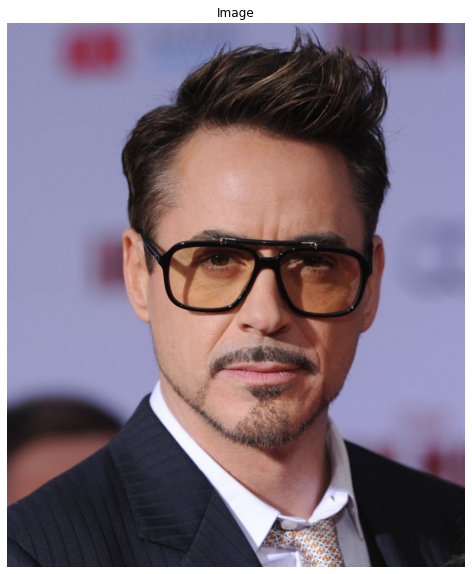

In [2]:
image = cv2.imread('sample.jpg')

plt.figure(figsize = [10, 10])

plt.title("Image");plt.axis('off');plt.imshow(image[:,:,::-1]);plt.show()

Code breakdown: 

* Here firstly we have read the image using **imread** function and please note that the image type is **.webp**.
* Then we are using the **figure** function from matplotlib's library to set the figure size.
* At the last we will simply show the image using **imshow** method.

### Resizing the image

In [3]:
image_resized = cv2.resize(image, None, fx=0.5, fy=0.5)

Here we are resizing the image so that for kernel of specific size (say 3x3) will give same results irrespective of the dimensions of the image.
Keep a close eye on the parameters that we have given in the **resize** function.
* image: Here we are simply passing the image that we want to resize.
* fx: This will help to cut the x axis by half (as the value is 0.5).
* fy: This will help to cut the y axis by half (as the value is 0.5).
* None: This option basically will set the height and width manupilation to None as we are just changing the axes of the image.

## Phase 2: Removing / Clearing the impurities

Now comes our **clearing the impurities** part where we will be using the **`median blur`** technique though we will also be using the **`bilateral filtering`** but later. 

In [4]:
image_cleared = cv2.medianBlur(image_resized, 3)
image_cleared = cv2.medianBlur(image_cleared, 3)
image_cleared = cv2.medianBlur(image_cleared, 3)

image_cleared = cv2.edgePreservingFilter(image_cleared, sigma_s=5)

Code breakdown


1. While looking at the code one question is definite which is, Why I have filtered the image **thrice**?
- **Answer:** The reason is simple we want the atmost filtered image so for that we need to filter the same image more than once (here thrice) so now we could get the more filtered image comparitively.

2. Along with **median blur filtering** we will be also using the **`Edge preserving filtering`** which is responsible to maintain the **constant color spread** along the whole image.
- Note: **`sigma_s`** is that deviation value which will be resposible to decide that on what **extent** it will combine all the colors.

## Phase 3: Bilateral Image filtering 

The main difference between **Gaussian filtering** and **Bilateral image filtering** is that In guassian blur it will only works with the blurring of the image i.e. only spaces are considered (no edges are preserved) but in the case of biltaeral filtering we will work with **`Gaussian kernel`** as well as **`Intensity`** of the image as well which will in turn focus on the higher intensity and will preserve the edges as well.

In [5]:
image_filtered = cv2.bilateralFilter(image_cleared, 3, 10, 5)

for i in range(2):
    image_filtered = cv2.bilateralFilter(image_filtered, 3, 20, 10)

for i in range(3):
    image_filtered = cv2.bilateralFilter(image_filtered, 5, 30, 10)

Code breakdown

Before breaking down the code we need to understand why we are using loops for bilateral filtering?
Answer: Because if we will increase the parameter value all at once then instead of **water color art** we will get the **cartoonify image** which is not our goal hence we are applying the filtering in loops and gradually increasing the value of sigma space.

Paramters of **`Bilateral filtering`**:

1. Source: Source image which is need to be filtered.
2. D: D is the diamater value of every pixel (here 3/5).
3. Sigma color: The more will be the value of sigma color the more farther color will mix in proportion.
4. Sigma Space: The more will be the value of sigma space then the color on wider space will started mixing.

## Tuning the art -  Sharpening the image

So when we used to apply **bilateral filtering** it used to blur the image though it preserved the edges yet convert the image into blur form so to remove that and get the clearer output we used to **sharpen** the image.

In [6]:
gaussian_mask= cv2.GaussianBlur(image_filtered, (7,7), 2)
image_sharp = cv2.addWeighted(image_filtered, 1.5, gaussian_mask, -0.5, 0)
image_sharp = cv2.addWeighted(image_sharp, 1.4, gaussian_mask, -0.2, 10)

Code breakdown:

1. First with the help of **Gaussian Blur** only we will subtract the part of the image to get the **gaussian mask**.
2. Then with the above gaussian mask we will be **sharpening** the image using **addWeighted()** function and if you will notice the parameter we are actually trying different values for **alpha and gamma** to get the desired results. 

## Displaying images

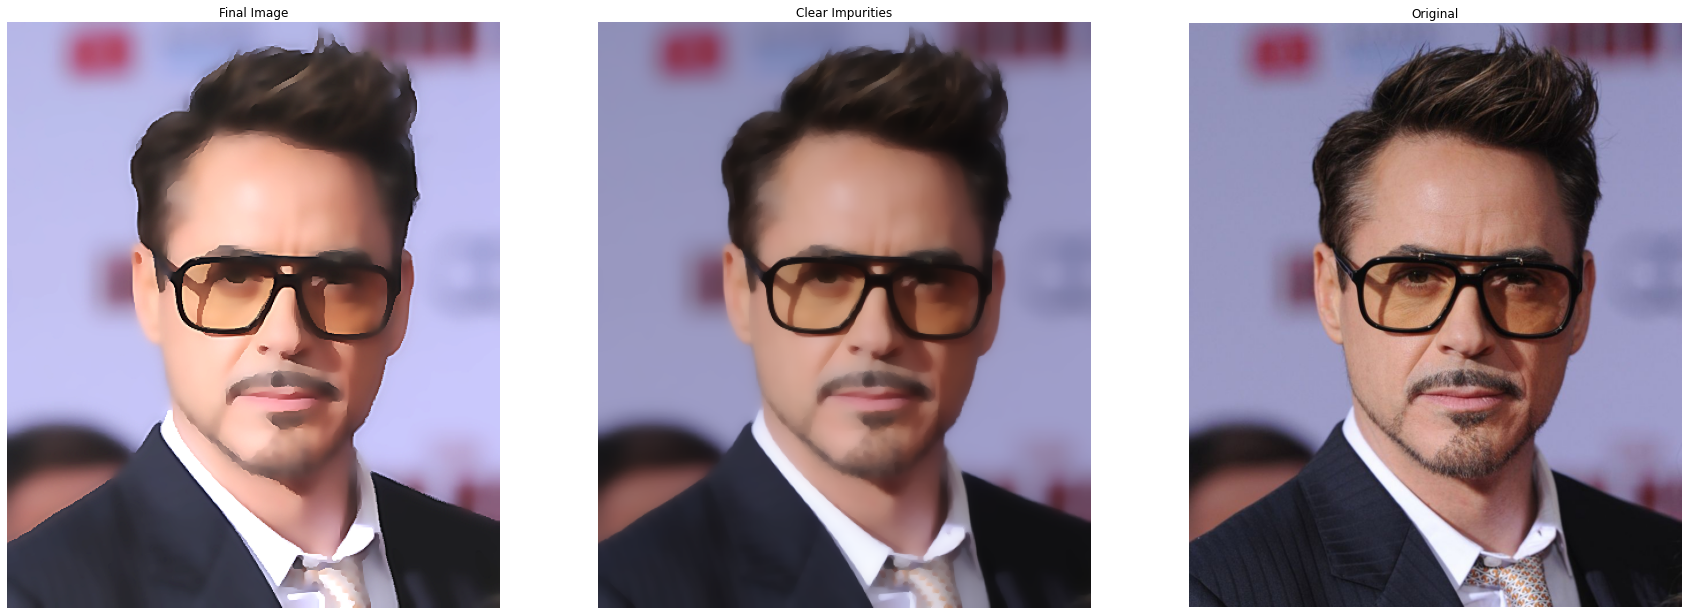

In [7]:
plt.figure(figsize=[30,30])
plt.subplot(131);plt.imshow(image_sharp[:,:,::-1]);plt.title("Final Image");plt.axis('off');
plt.subplot(132);plt.imshow(image_cleared[:,:,::-1]);plt.title("Clear Impurities");plt.axis('off');
plt.subplot(133);plt.imshow(image[:,:,::-1]);plt.title("Original");plt.axis('off');

Code breakdown

As we have already discussed about plotting the image previously in the article so one can refer that. There is only one point to be noted in this part which is **subplot** that is dividing the section of image into three parts 
1. Final image
2. Clear impurities
3. Original image (simulataneously)

## Conclusion

1. Here the very first thing which we learnt is about the **resize** function which is very much underrated yet important.
2. Then we came to know about different algorithms and concept which helped to clear the **impurities** from the images.
3. And at the last we learnt about giving the **final touch** to the processing i.e. **tuning the image**, to improve the quality of the result.